## 1. Use Google Drive link to view a folder I shared with @columbia.edu google drive users
https://drive.google.com/drive/folders/18O-BnGOIw9ZiUwy17Uk_361xyfTF-qAN?usp=sharing
## 2. Right click folder and click "Add shortcut to Drive"
This will make sure the zipfile in this folder is accessible in your personal drive folder


In [1]:
from IPython.display import Image
from IPython.core.display import HTML

In [2]:
# Step 2.1
#Image(url= "https://github.com/user-attachments/assets/6515aa71-484b-4364-ac44-2331477720e8", width=600, height=300)

In [3]:
# Step 2.2
#Image(url= "https://github.com/user-attachments/assets/0d0d8f6c-a868-49c4-9e38-54f3006af39b", width=600, height=300)

## 3. Reference Code for Project 2

In [4]:
# Connect to google drive
#import os
#from google.colab import drive
#drive.mount('/content/drive')

# content in your drive is now available via "/content/drive/My Drive"


Mounted at /content/drive


In [5]:
# Import data and unzip files to folder
#!unzip /content/drive/MyDrive/COVID-19_Radiography_Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7933.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7934.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7935.png  
 

In [1]:
import sys
print(sys.executable)  # sanity check: which Python the kernel is using

# install OpenCV for THIS kernel
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install opencv-python

# if you're on a server/CI without GUI backends, use headless instead:
# !{sys.executable} -m pip install opencv-python-headless


c:\Users\Owner\AppData\Local\Programs\Python\Python312\python.exe
  Using cached pip-25.3-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.3-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ----------------- ---------------------- 16.8/39.0 MB 105.9 MB/s eta 0:00:01
   ------------------------------------- -- 36.2/39.0 MB 95.8 MB/s eta 0:00:01
   ---------------------------------------- 39.0/39.0 MB 88.6 MB/s  0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 12.6/12.6 MB 88.2 MB/s  0:00:00

   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   -----------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
# Load libraries and then download data

import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3


In [7]:
# Extracting all filenames iteratively
base_path = 'COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']

# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:2]) #examples of file names

number of images for each category: [3616, 10192, 1345]
[['COVID-19_Radiography_Dataset\\COVID/images\\COVID-1.png', 'COVID-19_Radiography_Dataset\\COVID/images\\COVID-10.png', 'COVID-19_Radiography_Dataset\\COVID/images\\COVID-100.png', 'COVID-19_Radiography_Dataset\\COVID/images\\COVID-1000.png', 'COVID-19_Radiography_Dataset\\COVID/images\\COVID-1001.png', 'COVID-19_Radiography_Dataset\\COVID/images\\COVID-1002.png', 'COVID-19_Radiography_Dataset\\COVID/images\\COVID-1003.png', 'COVID-19_Radiography_Dataset\\COVID/images\\COVID-1004.png', 'COVID-19_Radiography_Dataset\\COVID/images\\COVID-1005.png', 'COVID-19_Radiography_Dataset\\COVID/images\\COVID-1006.png', 'COVID-19_Radiography_Dataset\\COVID/images\\COVID-1007.png', 'COVID-19_Radiography_Dataset\\COVID/images\\COVID-1008.png', 'COVID-19_Radiography_Dataset\\COVID/images\\COVID-1009.png', 'COVID-19_Radiography_Dataset\\COVID/images\\COVID-101.png', 'COVID-19_Radiography_Dataset\\COVID/images\\COVID-1010.png', 'COVID-19_Radiograp

In [8]:
#Reduce number of images to first 1345 for each category
fnames[0]=fnames[0][0:1344]
fnames[1]=fnames[1][0:1344]
fnames[2]=fnames[2][0:1344]

In [9]:
# Import image, load to array of shape height, width, channels, then min/max transform.
# Write preprocessor that will match up with model's expected input shape.
from keras.preprocessing import image
import numpy as np
from PIL import Image

def preprocessor(img_path):
        img = Image.open(img_path).convert("RGB").resize((192,192)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-1.)/(255-1.) # min max transformation
        img=img.reshape((192,192,3)) # Create final shape as array with correct dimensions for Keras
        return img



#Try on single flower file (imports file and preprocesses it to data with following shape)
preprocessor('COVID-19_Radiography_Dataset/COVID/images/COVID-2273.png').shape

(192, 192, 3)

In [10]:
#Import image files iteratively and preprocess them into array of correctly structured data

# Create list of file paths
image_filepaths=fnames[0]+fnames[1]+fnames[2]

# Iteratively import and preprocess data using map function

# map functions apply your preprocessor function one step at a time to each filepath
preprocessed_image_data=list(map(preprocessor,image_filepaths ))

# Object needs to be an array rather than a list for Keras (map returns to list object)
X= np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

In [11]:
len(image_filepaths)

4032

In [12]:
print(len(X) ) #same number of elements as filenames
print(X.shape ) #dimensions now 192,192,3 for all images
print(X.min().round() ) #min value of every image is zero
print(X.max() ) #max value of every image is one


4032
(4032, 192, 192, 3)
-0.0
1.0


In [13]:
len(fnames[2])

1344

In [16]:
# Create y data made up of correctly ordered labels from file folders
from itertools import repeat

# Recall that we have five folders with the following number of images in each folder
#...corresponding to each flower type

print('number of images for each category:', [len(f) for f in fnames])
covid=list(repeat("COVID", 1344))
normal=list(repeat("NORMAL", 1344))
pneumonia=list(repeat("PNEUMONIA", 1344))

#combine into single list of y labels
y_labels = covid+normal+pneumonia

#check length, same as X above
print(len(y_labels) )

# Need to one hot encode for Keras.  Let's use Pandas

import pandas as pd
y=pd.get_dummies(y_labels)

display(y)

number of images for each category: [1344, 1344, 1344]
4032


,COVID,NORMAL,PNEUMONIA
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
4027,False,False,True
4028,False,False,True
4029,False,False,True
4030,False,False,True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.003937008..0.8425197].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.003937008..0.8897638].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.003937008..0.98031497].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.003937008..0.98031497].


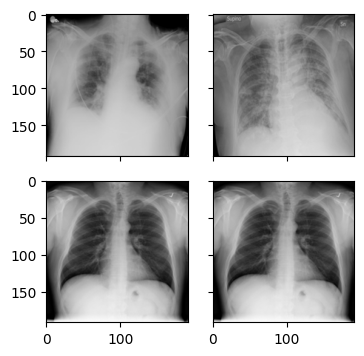

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

im1 =preprocessor(fnames[0][0])
im2 =preprocessor(fnames[0][1])
im3 =preprocessor(fnames[1][1])
im4 =preprocessor(fnames[1][1])

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3, im4]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
plt.show()

In [18]:
# ======Train test split resized images (Hackathon Note!! Use same train test split to be able to submit predictions to leaderboard!)=======================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.32, random_state = 1987)


X_test.shape, y_test.shape

((1291, 192, 192, 3), (1291, 3))

In [19]:
#Clear objects from memory
del(X)
del(y)
del(preprocessed_image_data)

In [20]:
#Save data to be able to reload quickly if memory crashes or if you run Runtime>Restart Runtime
import pickle

# Open a file and use dump()
with open('X_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_train, file)

with open('X_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_test, file)

with open('y_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_train, file)

with open('y_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_test, file)

In [19]:
#If you run out of Colab memory restart runtime, reload data and try again
import pickle

# Open the file in binary mode
with open('X_train.pkl', 'rb') as file:
    # Call load method to deserialze
    X_train = pickle.load(file)

# Open the file in binary mode
with open('y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)

## Dataset Statistics and Exploratory Samples


In [1]:
# Class counts: original dataset vs. balanced subset; train/test sizes and distributions
import os
import pickle
import pandas as pd
from collections import OrderedDict

base_path = 'COVID-19_Radiography_Dataset'
classes = OrderedDict([
    ('COVID', os.path.join(base_path, 'COVID', 'images')),
    ('NORMAL', os.path.join(base_path, 'Normal', 'images')),
    ('PNEUMONIA', os.path.join(base_path, 'Viral Pneumonia', 'images')),
])

# Count original files on disk (PNG only)
orig_counts = {label: sum(f.lower().endswith('.png') for f in os.listdir(folder)) for label, folder in classes.items()}

# Balanced cap used earlier
balanced_cap = 1344
balanced_counts = {label: min(count, balanced_cap) for label, count in orig_counts.items()}

stats_df = pd.DataFrame({
    'class': list(classes.keys()),
    'original_count': [orig_counts[c] for c in classes.keys()],
    'balanced_count': [balanced_counts[c] for c in classes.keys()],
})

print('Overall counts (original vs. balanced):')
display(stats_df)
print('\nTotals: original =', sum(orig_counts.values()), ', balanced =', sum(balanced_counts.values()))

# Train/test shapes and per-class distributions (from saved split)
with open('X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)
with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

print('\nTrain/Test shapes:')
print('X_train:', getattr(X_train, 'shape', None), ' y_train:', getattr(y_train, 'shape', None))
print('X_test :', getattr(X_test, 'shape', None),  ' y_test :', getattr(y_test, 'shape', None))

# y_* are one-hot DataFrames
if isinstance(y_train, pd.DataFrame):
    train_dist = y_train.sum(axis=0).astype(int)
    test_dist = y_test.sum(axis=0).astype(int)
    print('\nPer-class counts in train:')
    display(train_dist.to_frame('count').T)
    print('Per-class counts in test:')
    display(test_dist.to_frame('count').T)


Overall counts (original vs. balanced):


,class,original_count,balanced_count
0,COVID,3616,1344
1,NORMAL,10192,1344
2,PNEUMONIA,1345,1344



Totals: original = 15153 , balanced = 4032

Train/Test shapes:
X_train: (2741, 192, 192, 3)  y_train: (2741, 3)
X_test : (1291, 192, 192, 3)  y_test : (1291, 3)

Per-class counts in train:


,COVID,NORMAL,PNEUMONIA
count,914,914,913


Per-class counts in test:


,COVID,NORMAL,PNEUMONIA
count,430,430,431


### Image Samples per Class (Balanced Subset)


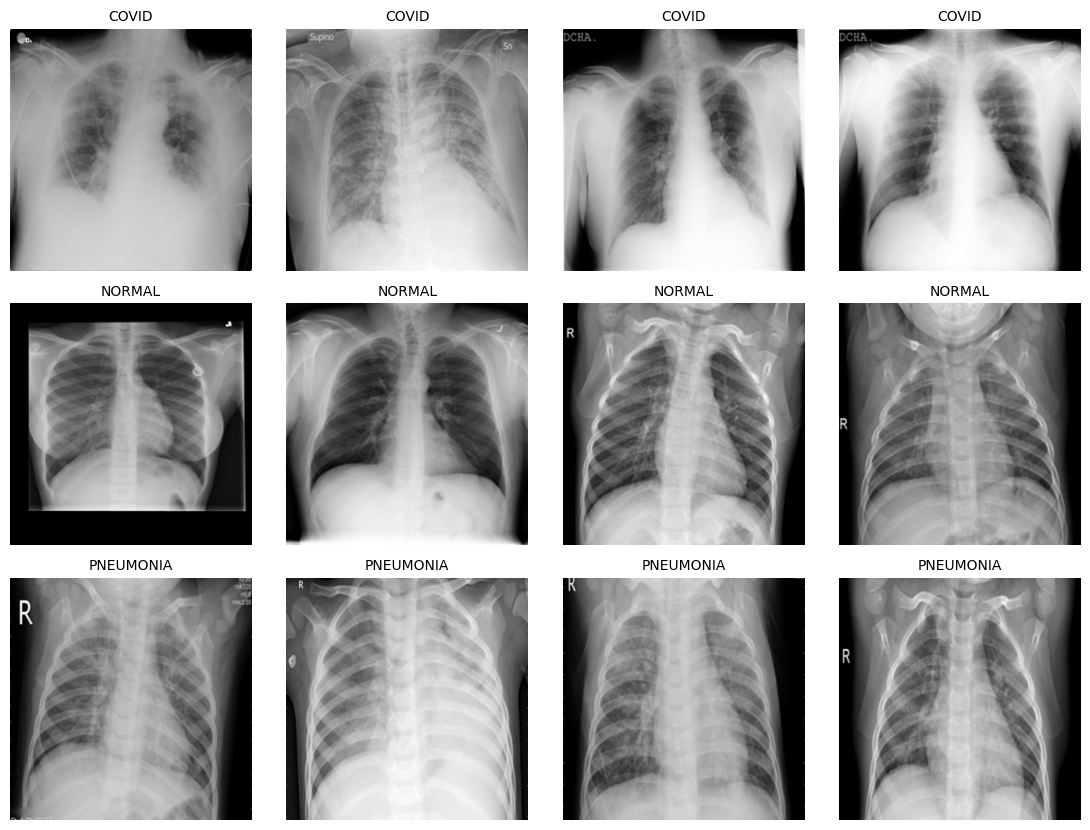

In [5]:
# Visualize a grid of sample images from each class (unprocessed display)
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

random.seed(1987)

base_path = 'COVID-19_Radiography_Dataset'
class_to_folder = {
    'COVID': os.path.join(base_path, 'COVID', 'images'),
    'NORMAL': os.path.join(base_path, 'Normal', 'images'),
    'PNEUMONIA': os.path.join(base_path, 'Viral Pneumonia', 'images'),
}

n_per_class = 4
fig, axes = plt.subplots(nrows=3, ncols=n_per_class, figsize=(2.8*n_per_class, 2.8*3))
for r, (label, folder) in enumerate(class_to_folder.items()):
    # deterministically choose first N after sorting to avoid random collisions
    files = sorted([f for f in os.listdir(folder) if f.lower().endswith('.png')])[:1344]
    chosen = files[:n_per_class]
    for c, fname in enumerate(chosen):
        path = os.path.join(folder, fname)
        img = Image.open(path)
        # Display as grayscale if single-channel
        if img.mode != 'L':
            img_disp = img.convert('L')
        else:
            img_disp = img
        ax = axes[r, c]
        ax.imshow(img_disp, cmap='gray')
        ax.set_title(f"{label}", fontsize=10)
        ax.axis('off')
plt.tight_layout()
plt.show()


### Basic Image Properties and Intensity Distributions


,class,n_sampled,width_min,width_max,height_min,height_max,modes,pixel_mean_mean,pixel_mean_std
0,COVID,64,299,299,299,299,L,144.335668,18.226185
1,NORMAL,64,299,299,299,299,L,128.248025,27.469058
2,PNEUMONIA,64,299,299,299,299,"L, RGB",129.852521,17.786232


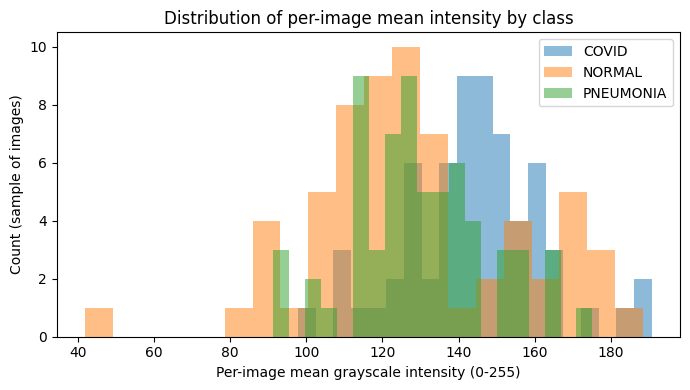

In [6]:
# Analyze image sizes, modes, and pixel intensity distributions
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

base_path = 'COVID-19_Radiography_Dataset'
class_to_folder = {
    'COVID': os.path.join(base_path, 'COVID', 'images'),
    'NORMAL': os.path.join(base_path, 'Normal', 'images'),
    'PNEUMONIA': os.path.join(base_path, 'Viral Pneumonia', 'images'),
}

sample_n = 64
summary_rows = []
class_intensity_samples = {}

for label, folder in class_to_folder.items():
    files = sorted([f for f in os.listdir(folder) if f.lower().endswith('.png')])[:1344]

    # take first sample_n for determinism
    chosen = files[:sample_n]
    widths, heights, modes = [], [], []
    per_image_means = []

    for fname in chosen:
        path = os.path.join(folder, fname)
        img = Image.open(path)
        widths.append(img.width)
        heights.append(img.height)
        modes.append(img.mode)
        gray = img.convert('L')
        arr = np.asarray(gray, dtype=np.uint8)
        per_image_means.append(arr.mean())

    summary_rows.append({
        'class': label,
        'n_sampled': len(chosen),
        'width_min': int(np.min(widths)),
        'width_max': int(np.max(widths)),
        'height_min': int(np.min(heights)),
        'height_max': int(np.max(heights)),
        'modes': ', '.join(sorted(set(modes))),
        'pixel_mean_mean': float(np.mean(per_image_means)),
        'pixel_mean_std': float(np.std(per_image_means)),
    })
    class_intensity_samples[label] = np.array(per_image_means)

summary_df = pd.DataFrame(summary_rows)
display(summary_df)

# Plot per-image mean intensity distributions by class
plt.figure(figsize=(7, 4))
for label, vals in class_intensity_samples.items():
    plt.hist(vals, bins=20, alpha=0.5, label=label)
plt.xlabel('Per-image mean grayscale intensity (0-255)')
plt.ylabel('Count (sample of images)')
plt.title('Distribution of per-image mean intensity by class')
plt.legend()
plt.tight_layout()
plt.show()


## Baseline Model — Convolutional Neural Network (from scratch)


In [8]:
# Prepare data arrays and labels
import os
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf

# Ensure reproducibility
np.random.seed(1987)
tf.random.set_seed(1987)

# Load arrays if not present in memory
if 'X_train' not in globals() or 'y_train' not in globals() or 'X_test' not in globals() or 'y_test' not in globals():
    with open('X_train.pkl', 'rb') as f:
        X_train = pickle.load(f)
    with open('y_train.pkl', 'rb') as f:
        y_train = pickle.load(f)
    with open('X_test.pkl', 'rb') as f:
        X_test = pickle.load(f)
    with open('y_test.pkl', 'rb') as f:
        y_test = pickle.load(f)

# Convert labels to numpy arrays
if isinstance(y_train, pd.DataFrame):
    class_names = y_train.columns.tolist()
    y_train_np = y_train.values.astype(np.float32)
    y_test_np = y_test.values.astype(np.float32)
else:
    # fallback
    class_names = [str(i) for i in range(y_train.shape[1])]
    y_train_np = y_train.astype(np.float32)
    y_test_np = y_test.astype(np.float32)

X_train_np = X_train.astype(np.float32)
X_test_np = X_test.astype(np.float32)

input_shape = X_train_np.shape[1:]
num_classes = y_train_np.shape[1]

print('Input shape:', input_shape)
print('Num classes:', num_classes)
print('Train size:', X_train_np.shape[0], ' Test size:', X_test_np.shape[0])


Input shape: (192, 192, 3)
Num classes: 3
Train size: 2741  Test size: 1291


In [9]:
# Build and compile a small baseline CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc', multi_label=False)]
)

model.summary()


c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 192, 192, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 192, 192, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 96, 96, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 96, 96, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 96, 96, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 48, 48, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,970,563 (72.37 MB)

 Trainable params: 18,969,603 (72.36 MB)

 Non-trainable params: 960 (3.75 KB)

In [10]:
# Train the CNN with early stopping and checkpointing
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

os.makedirs('models', exist_ok=True)
callbacks = [
    EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
    ModelCheckpoint('models/baseline_cnn.keras', monitor='val_loss', save_best_only=True)
]

history = model.fit(
    X_train_np, y_train_np,
    epochs=30,
    batch_size=32,
    validation_split=0.15,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 26s 338ms/step - accuracy: 0.8222 - auc: 0.9408 - loss: 0.5366 - val_accuracy: 0.3350 - val_auc: 0.5081 - val_loss: 16.3047
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 24s 323ms/step - accuracy: 0.8952 - auc: 0.9786 - loss: 0.2749 - val_accuracy: 0.3350 - val_auc: 0.5091 - val_loss: 17.6375
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 24s 327ms/step - accuracy: 0.9090 - auc: 0.9839 - loss: 0.2340 - val_accuracy: 0.3714 - val_auc: 0.5336 - val_loss: 6.0390
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 24s 329ms/step - accuracy: 0.9300 - auc: 0.9888 - loss: 0.1924 - val_accuracy: 0.5121 - val_auc: 0.6744 - val_loss: 2.4986
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 24s 323ms/step - accuracy: 0.9536 - auc: 0.9956 - loss: 0.1232 - val_accuracy: 0.5170 - val_auc: 0.6550 - val_loss: 3.4591
Epoch 6/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 24s 328ms/step - accuracy: 0.9747 - auc: 0.9979 - loss: 0.0807 - val_accuracy: 0.8058 - val_auc: 0.9388 - val_loss: 0.5701
Epoch 7/30
73/73 ━━━━━━━━━━━━━━━

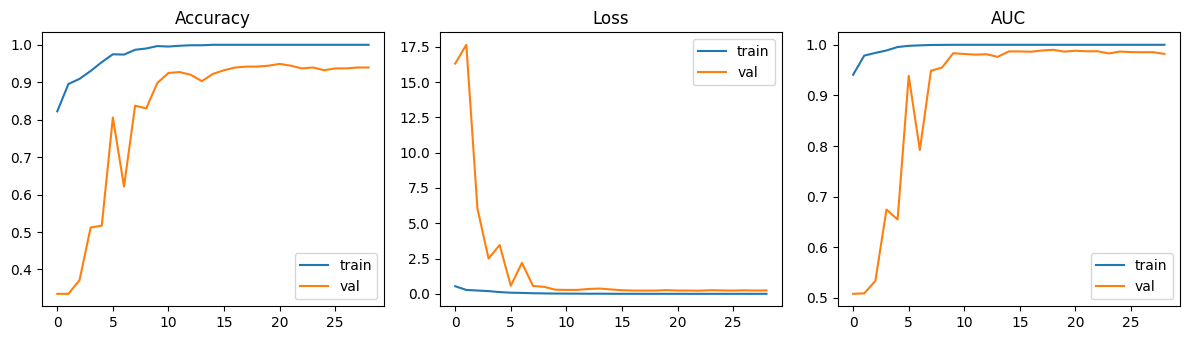

In [11]:
# Plot training curves
import matplotlib.pyplot as plt

hist = history.history

fig, axes = plt.subplots(1, 3, figsize=(12, 3.5))
axes[0].plot(hist['accuracy'], label='train')
axes[0].plot(hist['val_accuracy'], label='val')
axes[0].set_title('Accuracy')
axes[0].legend()

axes[1].plot(hist['loss'], label='train')
axes[1].plot(hist['val_loss'], label='val')
axes[1].set_title('Loss')
axes[1].legend()

if 'auc' in hist:
    axes[2].plot(hist['auc'], label='train')
    axes[2].plot(hist['val_auc'], label='val')
    axes[2].set_title('AUC')
    axes[2].legend()
else:
    axes[2].axis('off')

plt.tight_layout()
plt.show()


Test metrics:
  loss: 0.2320
  compile_metrics: 0.9442

Classification report:
              precision    recall  f1-score   support

       COVID     0.9477    0.9279    0.9377       430
      NORMAL     0.9101    0.9419    0.9257       430
   PNEUMONIA     0.9765    0.9629    0.9696       431

    accuracy                         0.9442      1291
   macro avg     0.9448    0.9442    0.9444      1291
weighted avg     0.9448    0.9442    0.9444      1291



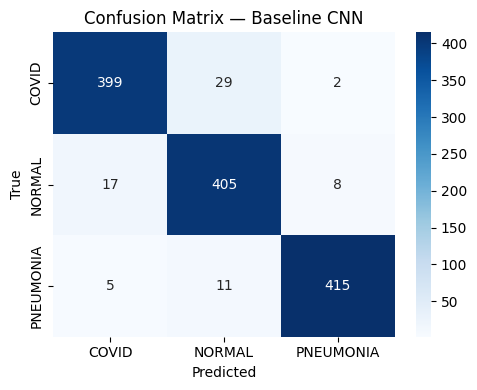

In [14]:
# Evaluate on the held-out test set and show confusion matrix
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate
results = model.evaluate(X_test_np, y_test_np, verbose=0)
metrics_names = model.metrics_names
print('Test metrics:')
for name, val in zip(metrics_names, results):
    print(f'  {name}: {val:.4f}')

# Predictions
probs = model.predict(X_test_np, verbose=0)
y_pred = np.argmax(probs, axis=1)
y_true = np.argmax(y_test_np, axis=1)

print('\nClassification report:')
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix — Baseline CNN')
plt.tight_layout()
plt.show()
